In [1]:
import sys, os
BIN = os.path.expanduser("../../../")
sys.path.append(BIN)
from scipy.constants import c

import numpy as np
import matplotlib.pyplot as plt

from PyHEADTAIL_feedback.core import process
from PyHEADTAIL_feedback.processors.misc import Bypass
from PyHEADTAIL_feedback.processors.convolution import Lowpass, Gaussian
from PyHEADTAIL_feedback.processors.resampling import Resampler

from PyHEADTAIL_feedback.signal_tools.plotters import plot_debug_data

In [2]:
from PyHEADTAIL_feedback.signal_tools.signal_generators import Beam, SimpleBeam
from PyHEADTAIL_feedback.signal_tools.signal_generators import CircularPointBeam, SimpleCircularPointBeam

In [3]:
# f_c = 10e6
# n_slices = 4
# intensity = 1e11
# n_bunches = 3
# bunch_spacing = 20e-9
# bunch_length = 4e-9
# simple_beam = SimpleBeam(n_bunches, bunch_spacing, bunch_length, intensity, n_slices)

# temp_x = simple_beam.x
# temp_x[simple_beam.z>10.] += 1.
# # temp_x[simple_beam.z>40.] -= 1.
# simple_beam.x = temp_x

# processors = [
#     Bypass(store_signal=True),
#     Lowpass(100e6,store_signal=True),
#     Resampler(('sequenced', 2000e6), 20, data_conversion='sum',store_signal=True),
#     Bypass(store_signal=True),
# ]

# parameters, signal = simple_beam.signal()

# parameters, signal = process(parameters, signal, processors)



# fig, ax1 = plt.subplots()
# ax2 = ax1.twiny()

# # ax1.plot(simple_beam.z,simple_beam.n_macroparticles_per_slice,'.')
# ax1.plot(simple_beam.z,simple_beam.x,'.')

# ax2.plot(simple_beam.t*1e6, np.zeros(len(simple_beam.t)))
# ax2.cla()

# ax1.set_xlabel('Z distance [m]')
# ax1.set_ylabel('Amplitude')
# ax2.set_xlabel('Time [us]')
# plt.show()


# fig, ax1, ax2 = plot_debug_data(processors)


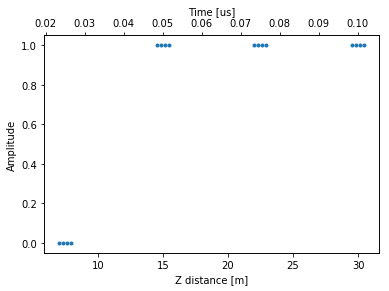

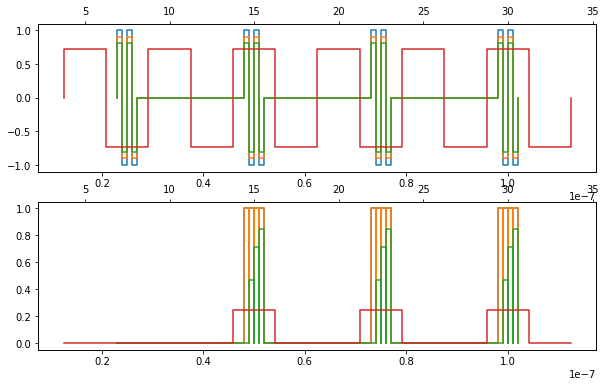

In [4]:

f_c = 10e6
n_slices = 4
intensity = 1e11
n_bunches = 3
bunch_length = 4e-9
circumference = 27000
h_RF = 3602

filling_scheme = np.linspace(1,4,4)

simple_beam = Beam(filling_scheme, circumference, h_RF, bunch_length, intensity, n_slices)

temp_x = simple_beam.x
temp_x[simple_beam.z>10.] += 1.
# temp_x[simple_beam.z>40.] -= 1.
simple_beam.x = temp_x

processors = [
    Bypass(store_signal=True),
    Lowpass(100e6,store_signal=True),
    Resampler(('harmonic', (circumference,h_RF)), 3, data_conversion='average',store_signal=True),
    Bypass(store_signal=True),
]

parameters, signal = simple_beam.signal()

parameters, signal = process(parameters, signal, processors)



fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

# ax1.plot(simple_beam.z,simple_beam.n_macroparticles_per_slice,'.')
ax1.plot(simple_beam.z,simple_beam.x,'.')

ax2.plot(simple_beam.t*1e6, np.zeros(len(simple_beam.t)))
ax2.cla()

ax1.set_xlabel('Z distance [m]')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time [us]')
plt.show()


fig, ax1, ax2 = plot_debug_data(processors)

149.896229
{}


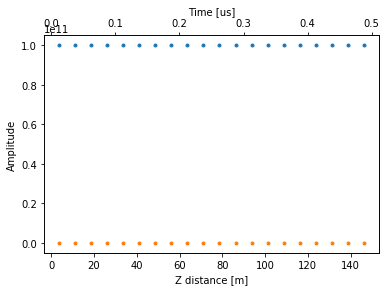

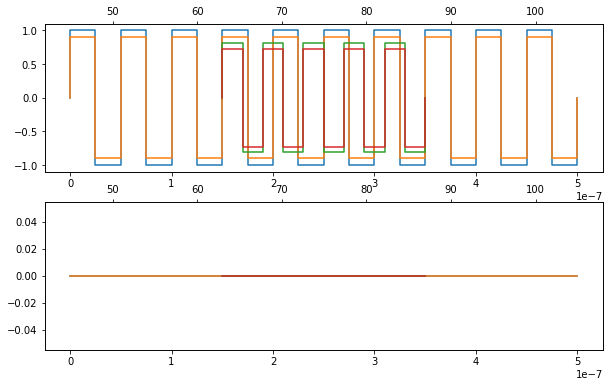

In [5]:
intensity = 1e11
n_bunches = 20
bunch_spacing = 25e-9
simple_circular_beam = SimpleCircularPointBeam(n_bunches, bunch_spacing, intensity, 0)


processors = [
    Bypass(store_signal=True),
    Lowpass(10e6,store_signal=True),
    Resampler(('sequenced', 50e6), 10,store_signal=True),
    Bypass(store_signal=True),
]

parameters, signal = simple_circular_beam.signal()

parameters, signal = process(parameters, signal, processors)

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

ax1.plot(simple_circular_beam.z,simple_circular_beam.n_macroparticles_per_slice,'.')
ax1.plot(simple_circular_beam.z,simple_circular_beam.x,'.')

ax2.plot(simple_circular_beam.t*1e6, np.zeros(len(simple_circular_beam.t)))
ax2.cla()

ax1.set_xlabel('Z distance [m]')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time [us]')
plt.show()

fig, ax1, ax2 = plot_debug_data(processors, 'output')

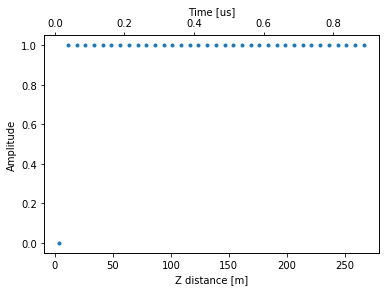

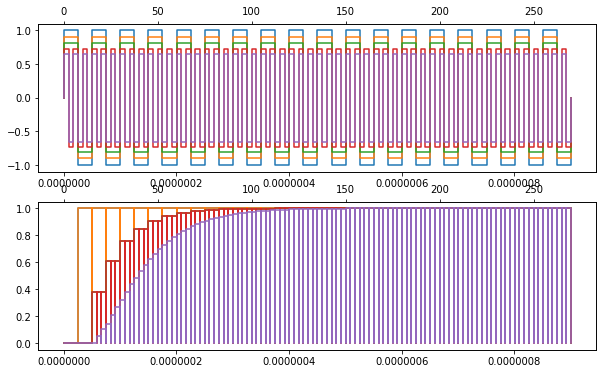

In [6]:

n_slices = 4
intensity = 1e11
n_bunches = 3
bunch_length = 4e-9
circumference = 270
h_RF = 36

filling_scheme = np.linspace(1,4,4)

simple_beam = CircularPointBeam(filling_scheme, circumference, h_RF, intensity, 0)

temp_x = simple_beam.x
temp_x[simple_beam.z>10.] += 1.
# temp_x[simple_beam.z>40.] -= 1.
simple_beam.x = temp_x

processors = [
    Bypass(store_signal=True),
    Lowpass(3e6,store_signal=True),
    Resampler(('harmonic', (circumference,h_RF)), 3, data_conversion='average',store_signal=True),
    Lowpass(3e6,store_signal=True),
    Bypass(store_signal=True),
]

parameters, signal = simple_beam.signal()
parameters, signal = process(parameters, signal, processors)



fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

# ax1.plot(simple_beam.z,simple_beam.n_macroparticles_per_slice,'.')
ax1.plot(simple_beam.z,simple_beam.x,'.')

ax2.plot(simple_beam.t*1e6, np.zeros(len(simple_beam.t)))
ax2.cla()

ax1.set_xlabel('Z distance [m]')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time [us]')
plt.show()


fig, ax1, ax2 = plot_debug_data(processors)